In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate

In [33]:
# load bp
with open("bp.csv", 'r') as bp_file:
    data = pd.read_csv(bp_file, sep=';')

print("BP file columns:\n\n%s" % data.columns)

# get first and second col and change representation to numpy-like
rs0dist = data[data.columns[0]].as_matrix()
rs0dose = data[data.columns[1]].as_matrix()

rs0dist = np.nan_to_num(rs0dist)
rs0dose = np.nan_to_num(rs0dose)

peak_max_position = rs0dist[rs0dose.argmax()]
print("\nDose == 1 is at range %s for %s" % (peak_max_position, data.columns[1]))

BP file columns:

Index(['x0', 'rs0', 'x0.955', 'y0.955', 'x1000', 'rs1000', 'x2000', 'y2000',
       'x3000', 'rs3000', 'x', 'rs4000', 'x.1', 'rs5000', 'x.2', 'rs6000',
       'x.3', 'rs7000', 'x.4', 'rs8000', 'x.5', 'rs9000', 'x.6', 'rs10000',
       'x.7', 'rs11000', 'x.8', 'rs12000', 'x.9', 'rs13000', 'x.10', 'rs14000',
       'x.11', 'rs15000', 'x.12', 'rs16000', 'x.13', 'rs17000', 'x.14',
       'rs18000'],
      dtype='object')

Dose == 1 is at range 28.24 for rs0


In [34]:
# load file with positions and weights
with open("pos.txt", "r") as pos_file:
    pos_we_data = pd.read_csv(pos_file, sep=';')

positions = pos_we_data['position'].as_matrix()
weights = pos_we_data['weight'].as_matrix()

print("Positions: %s" % positions)
print("Weights: %s " % weights)

Positions: [ 12.  14.  18.  20.  24.  26.]
Weights: [ 0.1    0.05   0.125  0.225  0.15   0.35 ] 


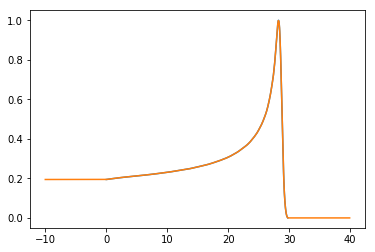

In [37]:
tck = interpolate.splrep(rs0dist, rs0dose)
test_domain = np.arange(0, 25, 0.01)

nx = np.arange(-10, 40, 0.1)
ny = interpolate.splev(nx, tck, ext=3)

plt.plot(rs0dist, rs0dose)
plt.plot(nx, ny)

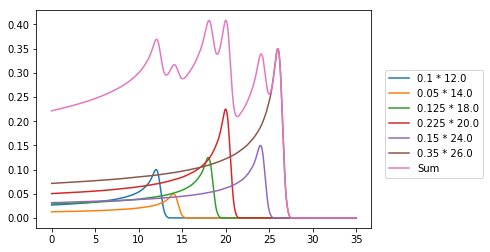

In [38]:
def rs0aprx(x, tck):
    return interpolate.splev(x, tck, ext=1)


tck = interpolate.splrep(rs0dist, rs0dose)
test_domain = np.arange(0, 35, 0.01)

processed_peaks = []
for e in range(len(positions)):
    tmp_peak = weights[e] * rs0aprx(test_domain + (peak_max_position - positions[e]), tck)
    processed_peaks.append(tmp_peak)
    plt.plot(test_domain, tmp_peak, label=str("%s * %s" % (weights[e], positions[e])))

plt.plot(test_domain, sum(processed_peaks), label="Sum")
plt.legend(bbox_to_anchor=(1.35, 0.75))